# Introduction to (social) network analysis

CMT224: Social Computing

<br>
<br>

## Case Study

## Dataset: Twitch Gamers

>![Twitch][1]
>
> Twitch is an American video live streaming service that focuses on video game live streaming, including broadcasts of esports competitions, in addition to offering music broadcasts, creative content, and "in real life" streams. It is operated by Twitch Interactive, a subsidiary of Amazon.com, Inc.  - Wikipedia
>
> Users can stream video content themselves as well as watch others. It has various social features built into the platform, including but not limited to: live chats during streams, mechanisms for 'following' other users (similarly to Twitter), a subscription model for users to support others for the content they produce. Among various other features.

[1]: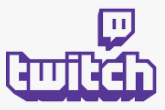



- We will look at the structure of social networks built using data from the 'follow' mechanism on Twitch where nodes are Twitch users and edges are mutual follower relationships between them.

- We will analyse the network of users using some example analyst tasks to answer an overarching question of whether Twitch following behaviour conforms to the typical structural characteristics seen in social networks more generally. 

- Along the way we will use various NetworkX APIs that implement methods from Graph Theory. The methods used will be demonstrative, but not be exhaustive of methods that can be used to undertake analysis tasks.

- The dataset used in this notebook is a sample of a larger dataset collected from the public Twitch API in Spring 2018. Available at: https://github.com/benedekrozemberczki/datasets#twitch-gamers. The paper the dataset is attached to: Rozemberczki, Benedek, and Rik Sarkar. ‘Twitch Gamers: A Dataset for Evaluating Proximity Preserving and Structural Role-Based Node Embeddings’. ArXiv:2101.03091, 2021. arXiv.org, http://arxiv.org/abs/2101.03091.


---

<font color="#F4A460">This exercise assumes a Python 3 ipykernel environment. </font>

<font color="#F4A460"> If you are not running a virtual environment, run the cell below. Then go to "Kernel" on the top menu and click "Restart Kernel". Or if you are running a virtual environment, install networkx, matplotlib, etc, and jupyter/ipykernel in the virtual environment instead. </font>


In [1]:
%pip install networkx matplotlib numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


---
<br>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import operator
import random


<br>
<br>

## 1. Using the network data file

- The Twitch network is represented in a standalone file (akin to a text file, csv file, etc. more generally). We need to read this file in some way and transform it into a NetworkX Graph object.

- The good news is that NetworkX supports a variety of file formats(e.g., GML, JSON) with a similar API method structure for reading from and writing to them:

https://networkx.org/documentation/stable/reference/readwrite/index.html



The Twitch network file is formatted into a .edgelist file where each 'row' in the file represents an edge in the network. Each row has two integers separated by a space that represent the node ids of two connected nodes in the network.

<br>

The following NetworkX API method can be used to read the file, create the Graph object, and add the edges all in one convenient call:

```python
read_edgelist(..)
```

https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html





> **Extra**: The edgelist format is flexible in formatting and the types of graphs it can represent:<br>
> https://networkx.org/documentation/stable/reference/readwrite/edgelist.html






<br>
<br>

In [4]:
G = nx.read_edgelist("twitch_sample.edgelist") # Assumes that the "twitch_sample.edgelist" file is same directory as this Notebook.

In [5]:
G = nx.read_gml("twitch_sample.gml")

> **Extra**: Replace the line in the cell above to use NetworkX's read_gml() method instead of read_edgelist: https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gml.read_gml.html
>
> Use the file "twitch_sample.gml", instead of the "twitch_sample.edgelist" file by as the argument passed.
>
> i.e., G = nx.read_gml("twitch_sample.gml")


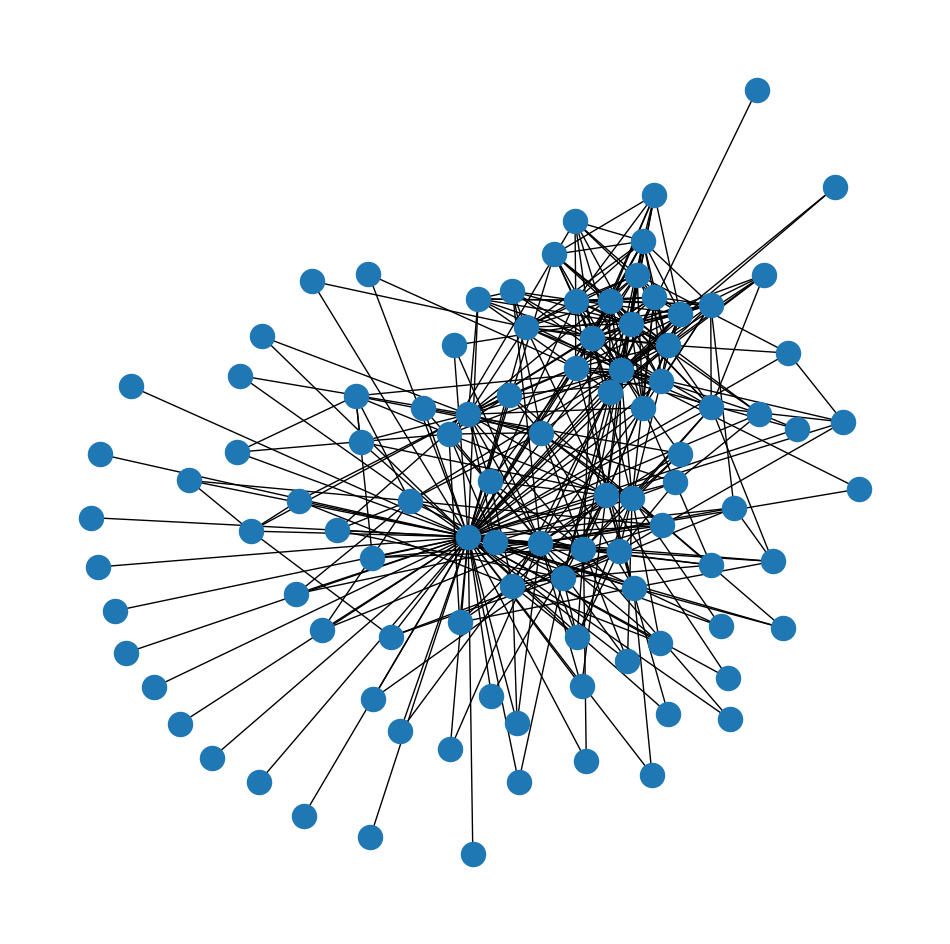

In [9]:
# Visualise the network - Refer to the Week 1 notebook for more information on visualising networks with NetworkX

fig1, ax1 = plt.subplots(figsize=(12,12)) # create a new Figure and Axis for plotting the network using matplotlib
nx.draw(G, ax=ax1) # use a NetworkX draw function (not matplotlib) to draw the Graph object onto the Figure. The 'ax' refers to the axis to draw the Graph, G, onto (creating the link with the line above).
plt.show() # show the result

<br>
<br>

### How many people? How many connections?

A typical first task in network analysis is to determine the number of nodes and edges in the network. NetworkX provides two conveniently named methods that are callable from the Graph object.

```python
G.number_of_nodes()  # Returns the number of nodes in the Graph object
G.number_of_edges()  # Returns the number of edges in the Graph object
```

https://networkx.org/documentation/stable/reference/classes/graph.html#counting-nodes-edges-and-neighbors

In [10]:

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 100
Number of edges: 407


> **Extra**: Unfamiliar with f-String formatting in Python 3? Read this blog post:<br>
> https://realpython.com/python-f-strings/#f-strings-a-new-and-improved-way-to-format-strings-in-python

<br>
<br>

---

<br>
<br>

## 2. How connected are the users in the network?

There are many ways that the connectivity of the network could be measured. We will explore some of these here and others in later notebooks.

### Density (or sparsity)

- An extension to calculating the number of nodes and edges in the network is to calculate the proportion of edges that exist in the network that could hypothetically exist.

- This provides the benefits for an analyst in contextualising how dense or sparse the network is. As the value is between 0 and 1 (or 0% and 100%), it also enables the density or sparsity to be easily compared across multiple, different networks if appropriate (more on this in later notebooks).

- This could be calculated in Python itself from the number of nodes and edges, but NetworkX provides a convenient API method that does it for us:

>```python
>nx.density(..)
>```
>
>https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html

<br>
<br>

In [11]:
print(f"Density (or sparsity): {nx.density(G):.3f}") #note, nx.density(G) not G.density()


Density (or sparsity): 0.082



Despite the visualisation of the Twitch network perhaps giving the impression of many edges (i.e., mutual following connections between users), the proportion of edges/connections that *exist* in the Twitch network is relatively small in comparison to the total possible edges/connections that *could exist*.


> **Extra**: Further Reading - "Real world" networks are often sparse: http://networksciencebook.com/chapter/2#real-networks

To help contextualise this further, lets visualise other *example graphs* using 20 nodes, one with no edges, another as a random graph with (roughly) the same density as the Twitch network, and another with all possible edges.

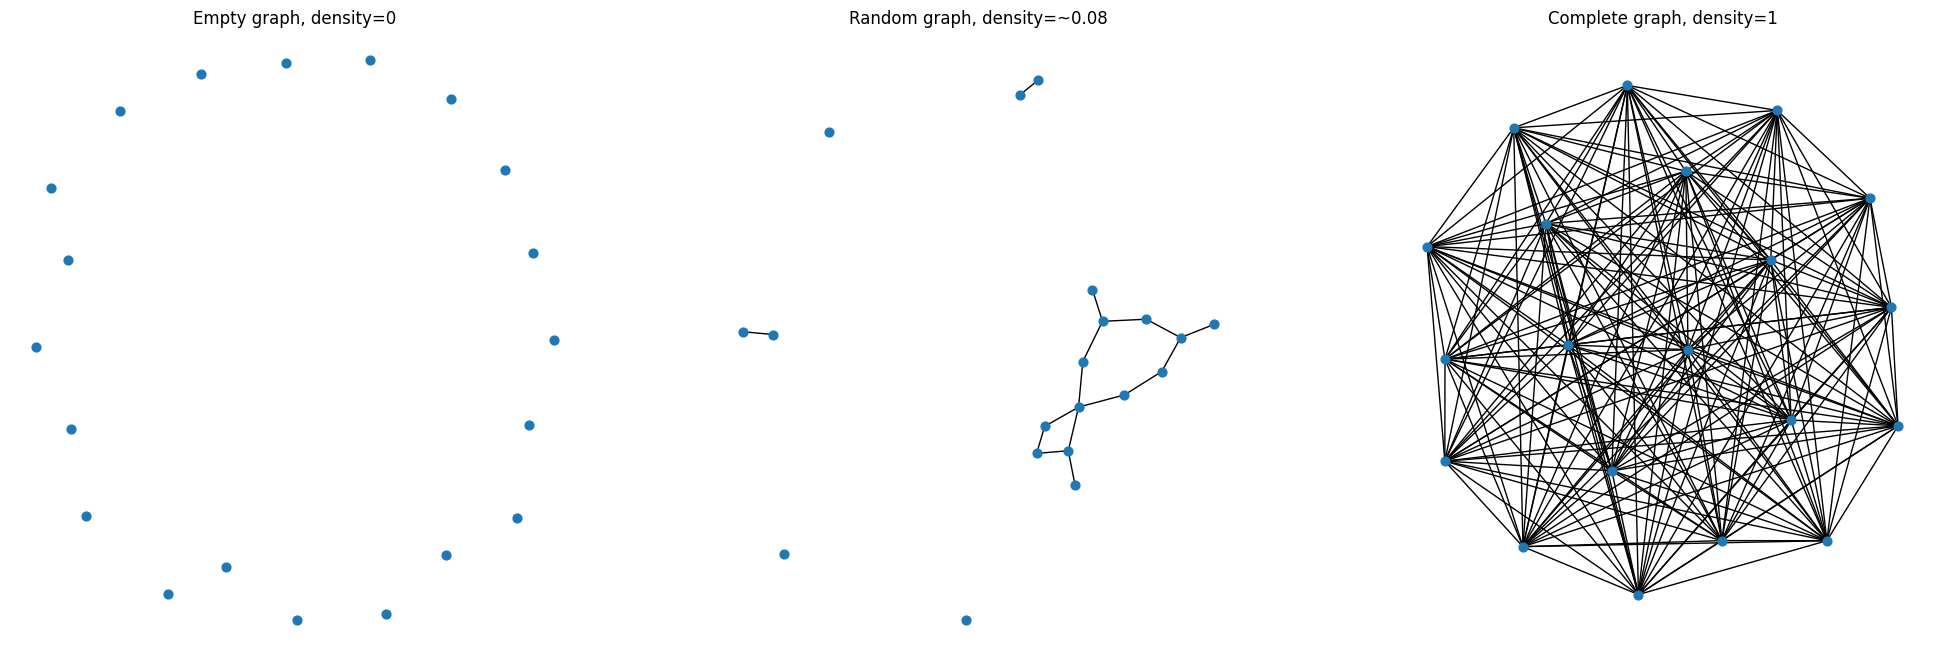

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8)) #create a plot containing two subplots/axs (1 row, 2 columns)

#draw an empty graph with 20 nodes (no edges): https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html
nx.draw(nx.empty_graph(20), ax=ax1, node_size=40) 
ax1.set_title('Empty graph, density=0')

#draw a random graph with 20 nodes and a similar density to the Twitch network (note, the number of edges pre-calculated): https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html
nx.draw(nx.gnm_random_graph(20, 16, seed=4), ax=ax2, node_size=40) 
ax2.set_title('Random graph, density=~0.08')

#draw a complete graph with 20 nodes (edges between all nodes): https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html
nx.draw(nx.complete_graph(20), ax=ax3, node_size=40) 
ax3.set_title('Complete graph, density=1')

plt.show()

<br>
<br>

Additionally, this doesn't tell us whether the number of edges (connections) are evenly distributed across the nodes (users), or whether some nodes have more edges than others.

For example, the following three example generated graphs all have 20 nodes and 20 edges, but different numbers of edges per the nodes:

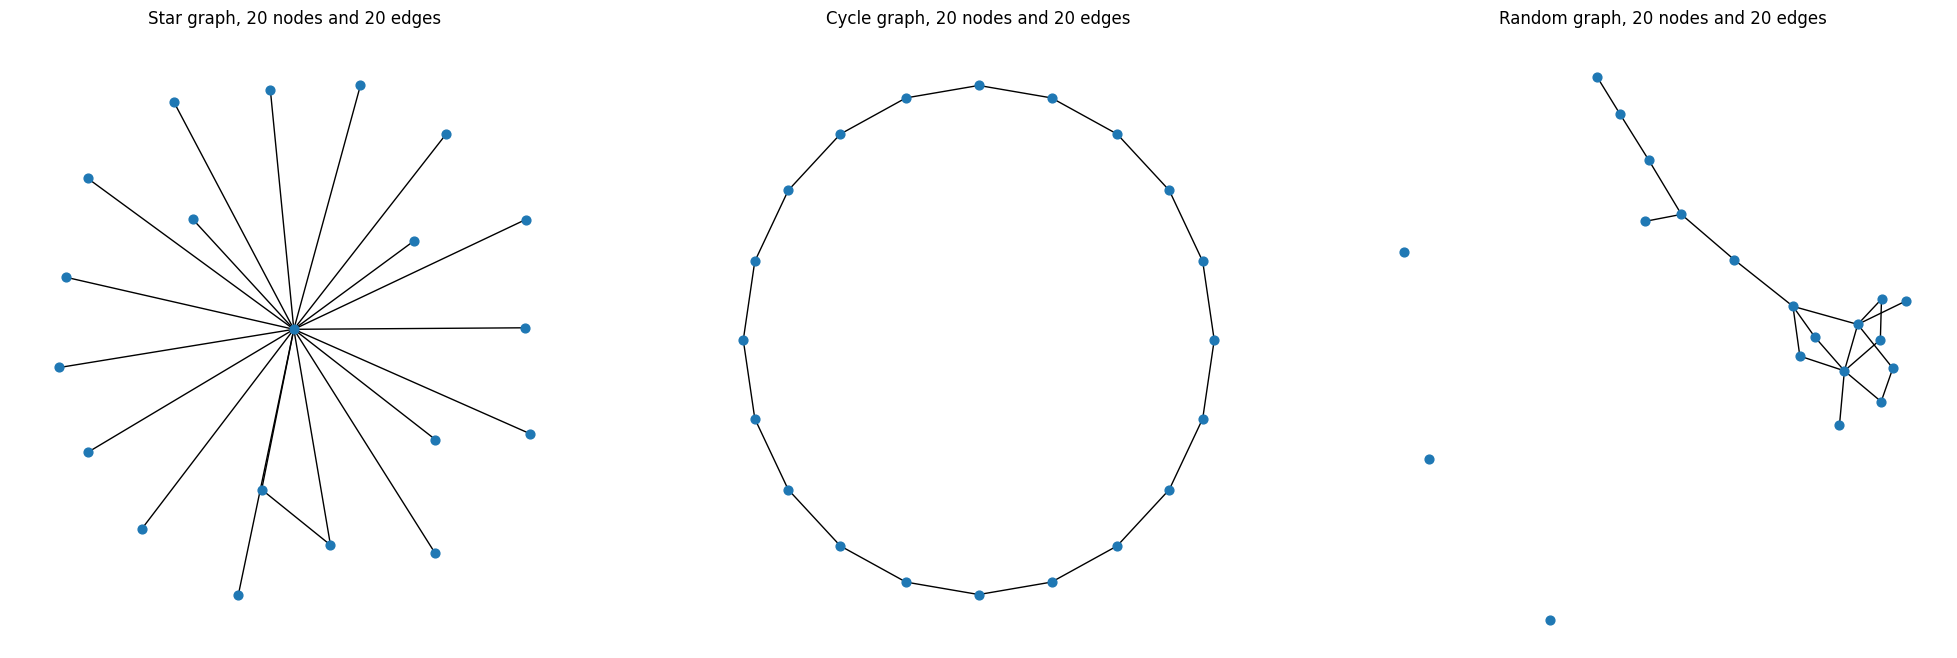

In [16]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(25, 8)) #create a plot containing two subplots/axs (1 row, 2 columns)

# draw a star graph with 20 nodes, 19 edges then add another edge
star = nx.star_graph(19)
star.add_edge(1,2)
nx.draw(star, ax=ax1, node_size=40) 
ax1.set_title('Star graph, 20 nodes and 20 edges')

# draw a circular graph with 20 nodes, 20 edges
cycle = nx.cycle_graph(20)
nx.draw_circular(cycle, ax=ax2, node_size=40) 
ax2.set_title('Cycle graph, 20 nodes and 20 edges')

# draw a random graph with 20 nodes, 20 edges
random = nx.gnm_random_graph(20, 20, seed=2)
nx.draw(random, ax=ax3, pos=nx.spring_layout(random, seed=1), node_size=40) 
ax3.set_title('Random graph, 20 nodes and 20 edges')
plt.show()

<br>
<br>

### Degree

We can examine how the edges in a network/graph are distributed by counting the number of edges each node is involved in.

This is termed the 'degree' of a node and NetworkX provides multiple ways to calculate the degree for all nodes in the network, a subset, or a single node:

```python
nx.degree(..) # As a NetworkX method, passing a Graph object as an argument
G.degree(..)  # or as a method attached to a Graph object
```

https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html


In [19]:
# Calculate the degree for all nodes in the Twitch network - the degree sequence

print(nx.degree(G))

[('65788', 7), ('3181', 8), ('145281', 8), ('73017', 4), ('48850', 2), ('151230', 3), ('134405', 1), ('10408', 1), ('66893', 22), ('1679', 14), ('105333', 3), ('87129', 3), ('129869', 2), ('79768', 4), ('24321', 2), ('134952', 2), ('36837', 9), ('40675', 5), ('89631', 24), ('141493', 77), ('113359', 2), ('18259', 5), ('34817', 1), ('60384', 5), ('91680', 3), ('42097', 2), ('54230', 19), ('62841', 1), ('155127', 22), ('96169', 4), ('3635', 13), ('30520', 20), ('16783', 10), ('103123', 3), ('123861', 14), ('10372', 14), ('98343', 39), ('105041', 4), ('1966', 5), ('54013', 1), ('49634', 2), ('157118', 20), ('84392', 2), ('17293', 3), ('75403', 7), ('9068', 9), ('44326', 6), ('50129', 8), ('34043', 4), ('106969', 16), ('113417', 9), ('90148', 14), ('133924', 3), ('151401', 9), ('78899', 19), ('95697', 12), ('95914', 17), ('83757', 1), ('109678', 2), ('111738', 1), ('125430', 24), ('63150', 2), ('147773', 4), ('17048', 4), ('116648', 21), ('59892', 10), ('54848', 1), ('138216', 2), ('87516'

<br>
<br>

In [21]:
# Calculate the degree for all nodes in the Twitch network - the degree sequence

""" 
1. Create an empty Python list. 
2. Calculate and loop over the degree of all nodes in the network. 
3. Add the degree of each node to the created list.
"""
"""
degree_sequence = []
for (node, degree) in nx.degree(G):
    degree_sequence.append(degree)
"""

degree_sequence = [d for (n, d) in nx.degree(G)] # Compressed version of the above
print(degree_sequence)

[7, 8, 8, 4, 2, 3, 1, 1, 22, 14, 3, 3, 2, 4, 2, 2, 9, 5, 24, 77, 2, 5, 1, 5, 3, 2, 19, 1, 22, 4, 13, 20, 10, 3, 14, 14, 39, 4, 5, 1, 2, 20, 2, 3, 7, 9, 6, 8, 4, 16, 9, 14, 3, 9, 19, 12, 17, 1, 2, 1, 24, 2, 4, 4, 21, 10, 1, 2, 16, 2, 3, 2, 3, 7, 1, 4, 3, 3, 9, 2, 12, 2, 1, 28, 12, 16, 1, 5, 10, 5, 1, 12, 5, 5, 6, 1, 1, 2, 8, 6]


<br>
<br>

Descriptive statistics can be used to help contextualise the differences in degree across the nodes.

In [23]:
# Calculate some descriptive statistics from the degree sequence

print(f"Descriptive Statistics:\n")
print(f"Mean degree: {np.mean(degree_sequence):.2f}")
print(f"Std. Deviation: {np.std(degree_sequence):.2f}")

Descriptive Statistics:

Mean degree: 8.14
Std. Deviation: 10.00


> **Extra**: Extend the cell above to also calulcate the minimum, maximum, and median values of the degree sequence. Numpy documentation pages for these descriptive statistics for reference are:
>
> https://numpy.org/doc/stable/reference/generated/numpy.amin.html
>
> https://numpy.org/doc/stable/reference/generated/numpy.amax.html
>
> https://numpy.org/doc/stable/reference/routines.statistics.html#averages-and-variances


**Observations from the descriptive statistics:**

- The average number of edges connected to each node is 8. Or put another way, each Twitch user is connected with 8 others on average.

- However, this can vary considerably given the standard deviation observed.


<br>
<br>


#### Visualising the differences in degree

Alternatively, or in addition to descriptive statistics, the distribution of the degree sequence can be visualised in different ways to contextualise the differences between the nodes. Two example visualisations are:

- A degree-rank plot: Sorts the distribution from largest to smallest (or smallest to largest), giving each node a 'rank' from 1..the number of nodes. A 'regular' graph where the degree is exactly the same for each node would produce a straight line.


- A degree histogram plot: Counts the number of nodes that have the same degree. A 'regular' graph where the degree is exactly the same for each node would produce a single bar.



[77, 39, 28, 24, 24, 22, 22, 21, 20, 20, 19, 19, 17, 16, 16, 16, 14, 14, 14, 14, 13, 12, 12, 12, 12, 10, 10, 10, 9, 9, 9, 9, 9, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


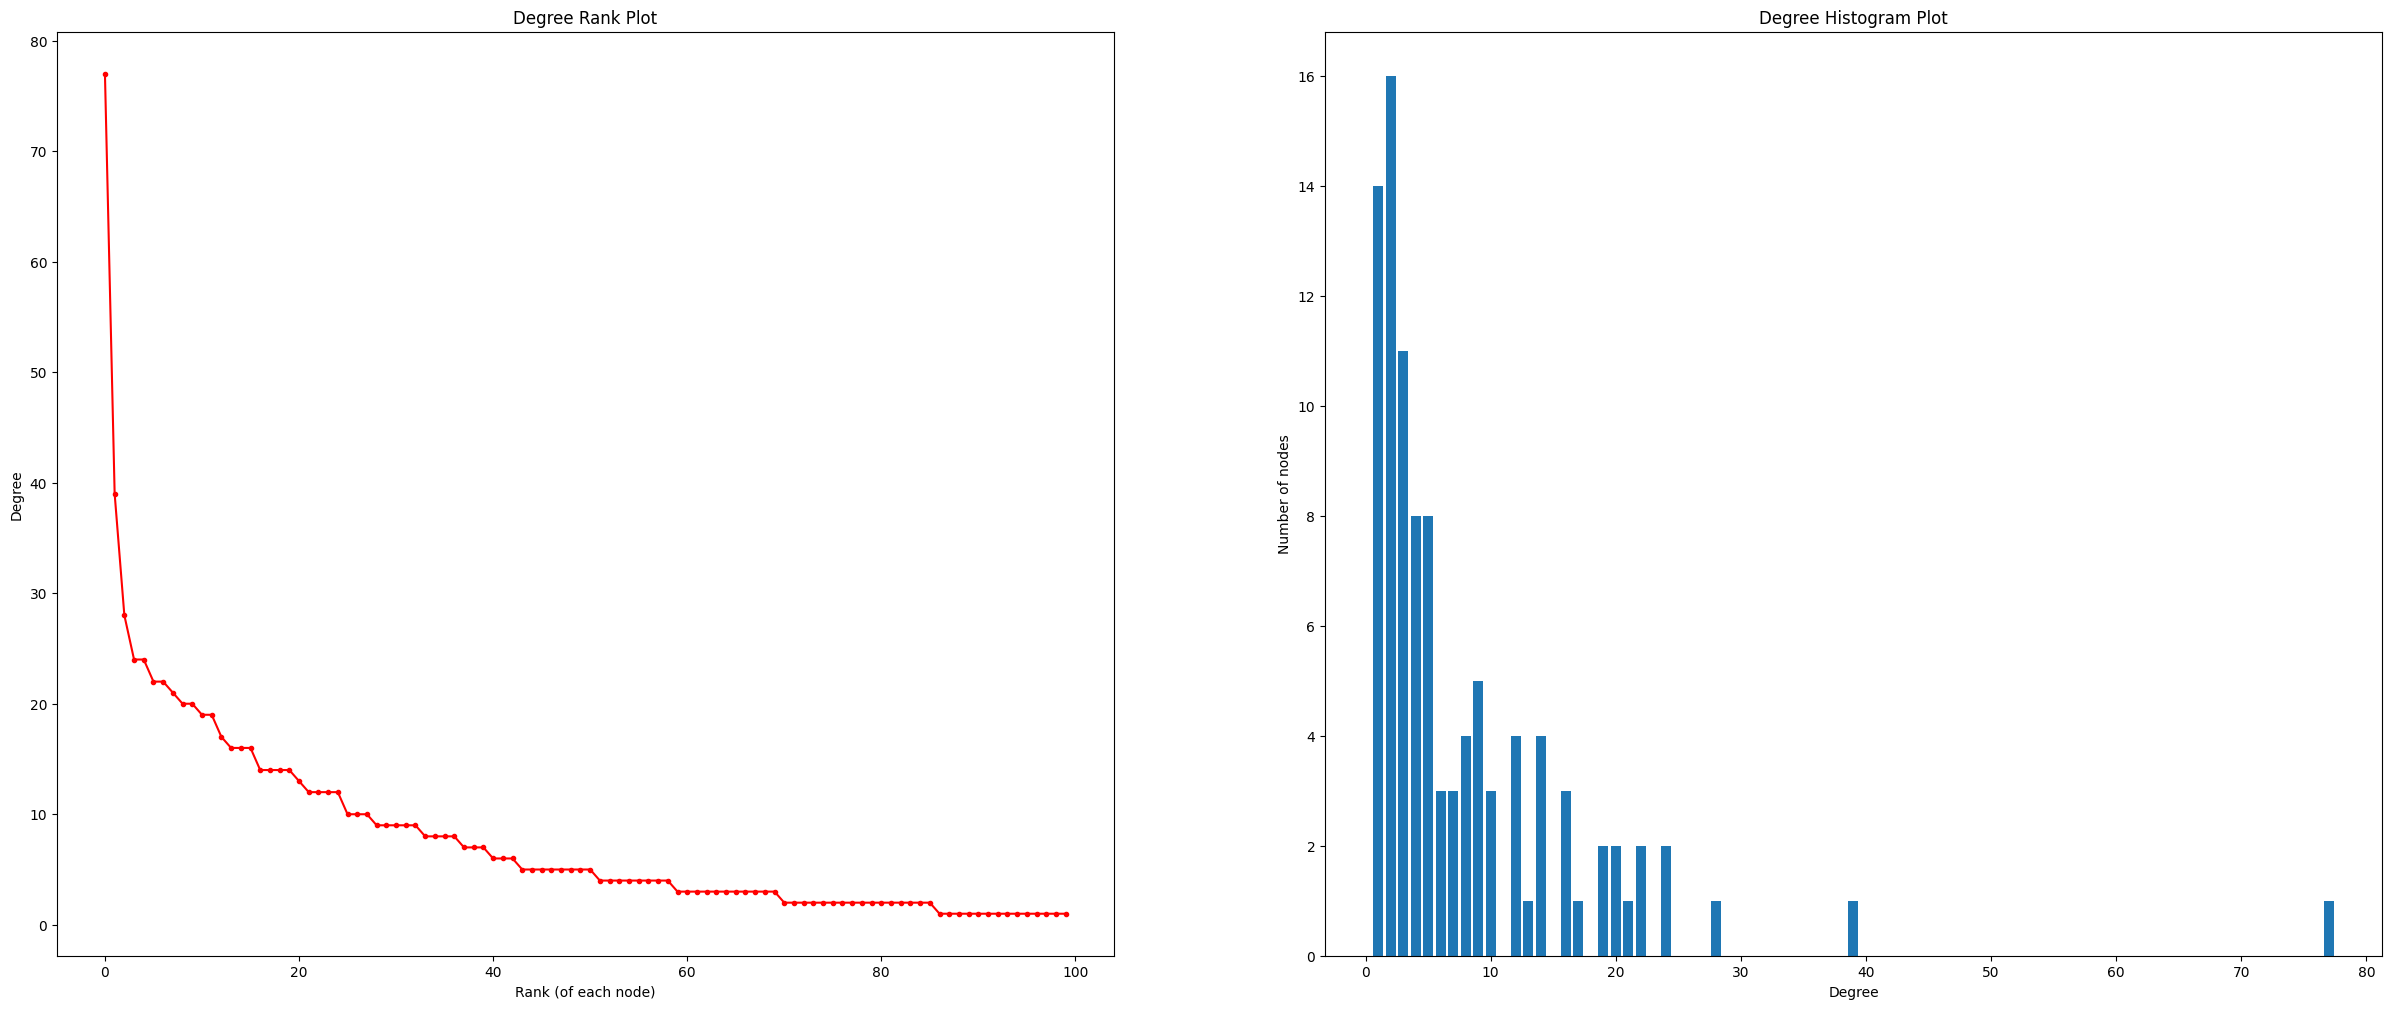

In [24]:
# Sort the degree sequence in reverse order
degree_sequence = sorted(degree_sequence, reverse=True)

# Output the sorted degree sequence to help contextualise what the plots are doing.
print(degree_sequence)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 12))

ax1.plot(degree_sequence, color="r", marker=".")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank (of each node)")

# unique() is a numpy library method that finds the unique items in a list (in this case degree values). 
# The return_counts parameter counts the number of times each unique item (in this case degree) appears
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
ax2.bar(*np.unique(degree_sequence, return_counts=True)) 
ax2.set_title("Degree Histogram Plot")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Number of nodes")

plt.show()

> **Extra**: Further Reading - Degree, Average Degree and Degree Distribution: http://networksciencebook.com/chapter/2#degree
>

<br>
<br>

### Summary of observations

1. The structure is quite sparse overall and may not follow a random graph
2. Most of the nodes have a similar number of connections, but some have many, many more.

<br> 
<br> 

Questions we *could* ask from this:
1. Is the structure of the network similar to that seen for social networks?
2. Who are the most 'influential' actor (nodes) in the network? Who connects communities of people? More on this in a later notebook

<br>

---

<br>
<br>

## 3. Six(?) degrees of separation

- It has suggested that any one person is only at most six social connections away from any other, i.e., through a friend of a friend of a friend of a friend.. etc.

- The concept can be traced back to a short story called "Láncszemek (Chains)" by the author and playwright Frigyes Karinthy in 1929. But the concept has been the subject of numerous 'real world' experiments since by academics, including most notably by Stanley Milgram in 1967.

- A good source for more information on the history of the concept is in Albert-László Barabási's book, 'Linked' - Chapter 3: https://barabasi.com/f/632.pdf

- The concept has been revisited since the rise of social media, including studies published by Meta Research (then Facebook) in 2012 and 2016, which showed that within Facebook the number was between 3.5 and 4:
https://research.facebook.com/publications/four-degrees-of-separation/
https://research.facebook.com/blog/2016/2/three-and-a-half-degrees-of-separation/

> **Extra**: This has led to other concepts being proposed such as "Three Degrees of Influence", by Christakis and Fowler.
>
> [![](https://img.youtube.com/vi/2U-tOghblfE/2.jpg)](https://www.youtube.com/watch?v=2U-tOghblfE)
>

> **Extra**: The Erdös Number Project: <br>
> https://sites.google.com/oakland.edu/grossman/home/the-erdoes-number-project
>
> <br>The Erdös Number Project Statistics Page: <br>
> https://sites.google.com/oakland.edu/grossman/home/the-erdoes-number-project/facts-about-erdoes-numbers-and-the-collaboration-graph
> 

<br>
<br>

### Paths

Lets investigate the degrees of separation of Twitch users in our network to see how this compares. To do this we can look at "paths" in our network where a path is a sequence of edges from one node to another.


> **Extra**: Further reading:<br> http://networksciencebook.com/chapter/2#paths

![Path example][1] - John R. Ladd

[1]: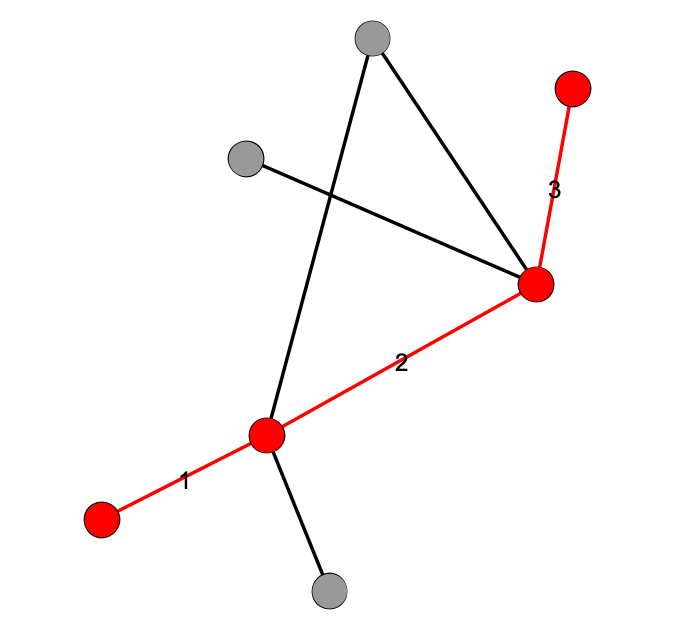






<br>
<br>

Paths are a useful concept for analysing graphs as they represent 'distance' between nodes, which can then be used for activities such as simulating and measuring (hypothetical) information flow across a network.

Before we start, there are some key considerations, including:
1. There can be more than one path between two nodes and these could be different lengths.
2. Paths could be an almost infinite length long if nodes in between can be 'visited' more than once.

![Shortest path example][2] - Albert-László Barabási


[2]: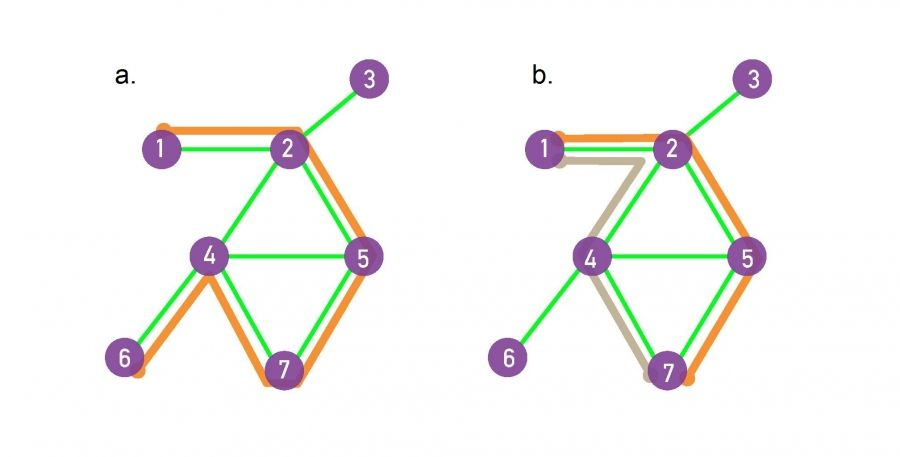

<br>
<br>


Therefore to reduce the complexity of this we will:

1. Restrict our look at paths to 'simple paths' where each node in a path can only appear once.
2. Reduce what paths we look at to the shortest path or paths between the nodes.

<br>
<br>

### Shortest (simple) paths

NetworkX has an API method for calculating all of the shortest, simple paths from one node to another. Where G is the graph object (network), u is the starting node and v is the finishing node:

```python 
nx.all_shortest_paths(G, u, v) # Returns a list of all of the shortest paths from u to v
```
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.all_shortest_paths.html#networkx.algorithms.shortest_paths.generic.all_shortest_paths


[2]: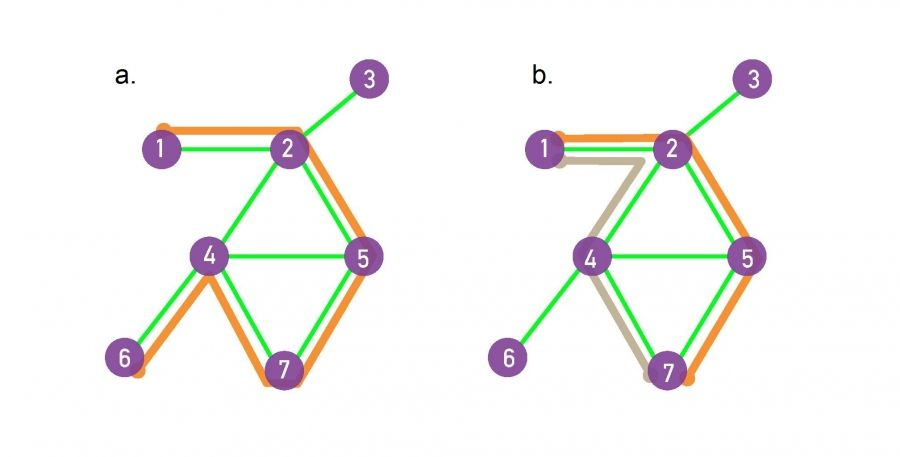

In [25]:
# Pre-selected node ids for demonstration simplicity
some_node_id = "3181" 
some_other_node_id = "24321"

shortest_paths = nx.all_shortest_paths( #expanded for readability 
    G, 
    some_node_id, 
    some_other_node_id)

print(f"Shortest paths from {some_node_id} to {some_other_node_id}:")
for path in shortest_paths:
    print(f" --> ".join(path))


Shortest paths from 3181 to 24321:
3181 --> 98343 --> 141493 --> 24321
3181 --> 157118 --> 141493 --> 24321
3181 --> 125430 --> 141493 --> 24321
3181 --> 89631 --> 141493 --> 24321
3181 --> 64605 --> 141493 --> 24321
3181 --> 10372 --> 141493 --> 24321
3181 --> 90697 --> 141493 --> 24321
3181 --> 98343 --> 30520 --> 24321
3181 --> 157118 --> 30520 --> 24321
3181 --> 125430 --> 30520 --> 24321
3181 --> 64605 --> 30520 --> 24321
3181 --> 10372 --> 30520 --> 24321


<br>
<br>

<br/>

For the degree of separation, we don't really care which of the shortest paths it is, just what the path length is:

NetworkX has another API method for conveniently calculating this only. Where G is the graph object (network), u is the starting node and v is the finishing mode:

```python 
nx.shortest_path_length(G, u, v) # Returns just the length of the shortest path(s)
```

In [74]:
some_shortest_path_length = nx.shortest_path_length(G, some_node_id, some_other_node_id)

print(f"Shortest path length from {some_node_id} to {some_other_node_id} is {some_shortest_path_length}")


Shortest path length from 3181 to 24321 is 3


<br>
<br>

This gives us the average distance between any two nodes, but this has to be repeated for all nodes/users in the network.

Fortunately, NetworkX has another convenient API method:

```python 
nx.average_shortest_path_length(G)
```

In [26]:
print(f"Average shortest path length in the network: {nx.average_shortest_path_length(G):.2f}")

Average shortest path length in the network: 2.11


<br>
<br>

So is this the degree of separation in our network? Not quite, but its still useful for contextualising the connectivity across the network and that in this case *typically* users are friends of a friend of one another. More on this later.

The degree of separation concerns the *maximum*, shortest distance from a node to any other, not the average, shortest distance from a node to others. For this there is 'eccentricity'.

<br>
<br>

### Eccentricity

Eccentricity of a node v is the maximum distance from v to all other nodes in the network (G).

```python
nx.eccentricity(G) # Calculates for all nodes in G

nx.eccentricity(G, v) # Calculates for only a given node (id)
```

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.eccentricity.html#networkx.algorithms.distance_measures.eccentricity


In [27]:
print(nx.eccentricity(G, v=some_node_id))

print(nx.eccentricity(G))

3
{'65788': 3, '3181': 3, '145281': 3, '73017': 3, '48850': 3, '151230': 3, '134405': 3, '10408': 3, '66893': 2, '1679': 3, '105333': 3, '87129': 3, '129869': 3, '79768': 3, '24321': 3, '134952': 3, '36837': 3, '40675': 3, '89631': 2, '141493': 2, '113359': 3, '18259': 3, '34817': 3, '60384': 3, '91680': 3, '42097': 3, '54230': 2, '62841': 3, '155127': 3, '96169': 3, '3635': 3, '30520': 2, '16783': 3, '103123': 3, '123861': 2, '10372': 2, '98343': 2, '105041': 3, '1966': 3, '54013': 3, '49634': 3, '157118': 2, '84392': 3, '17293': 3, '75403': 3, '9068': 3, '44326': 3, '50129': 3, '34043': 3, '106969': 2, '113417': 3, '90148': 2, '133924': 3, '151401': 2, '78899': 2, '95697': 2, '95914': 3, '83757': 3, '109678': 3, '111738': 3, '125430': 2, '63150': 3, '147773': 3, '17048': 3, '116648': 2, '59892': 3, '54848': 3, '138216': 3, '87516': 3, '55012': 3, '37182': 3, '131033': 3, '157585': 3, '73900': 3, '50511': 3, '41764': 3, '53279': 3, '79010': 3, '90697': 2, '144898': 3, '143081': 3, '55

<br>
<br>

From this we can see that the eccentricity of the nodes are not all the same. We are interested here in the maximum degree of separation across all nodes, but lets calculate several descriptive statistics to examine eccentricity further: 

In [28]:
eccentricity_sequence = list(nx.eccentricity(G).values())

print(f"Maximum degree of separation across all nodes (as path length): {np.amax(eccentricity_sequence)}")
print(f"Minimum degree of separation across all nodes (as path length): {np.amin(eccentricity_sequence)}")
print(f"Average degree of separation (as path length): {np.mean(eccentricity_sequence):.2f}")
print(f"Median degree of separation across all nodes (as path length): {np.median(eccentricity_sequence)}")

Maximum degree of separation across all nodes (as path length): 3
Minimum degree of separation across all nodes (as path length): 2
Average degree of separation (as path length): 2.82
Median degree of separation across all nodes (as path length): 3.0


<br>
Eccentricity can be also useful for other tasks such as modelling information diffusion/spreading (more on this in later notebooks). 

> **Extra**: Furthermore, related concepts, such as the diameter and radius allow us to capture the nodes at the extreme ends of these eccentricity values.
>
>```python
>nx.diameter(G) # The diameter of a network (G) is the maximum eccentricity.
>nx.periphery(G) # The set of nodes whose eccentricity is equal to the diameter
>
>nx.radius(G) # The radius of a network (G) is the minimum eccentricity.
>nx.center(G) # The set of nodes whose eccentricity is equal to the radius
>```
>
>Refer to the NetworkX documentation for more information on these and other distance measures: <br>
>https://networkx.org/documentation/stable/reference/algorithms/distance_measures.html

<br>
<br>


### Summary of observations

The degrees of separation is generally quite small, even in the worse case of path distance between nodes at one figurative 'end' of a network and another 'end'. This occurs even though the network is quite sparse.

Questions we *could* ask from this:

1. Does the network structure align to the typical structure of so-called 'Small-World' networks?


<br>

---

<br>
<br>


## 4. A Small-World?

It has been repeatedly found that social networks naturally structure themselves to have the following characteristics (in comparison to a random network with the same number of nodes and edges):

1. Despite the often sparsity of connections between people, the average 'distance' from one person to another is relatively small even as the network grows.
2. People's "friends" are more likely to be "friends" themselves.


> **Extra**: Further Reading: <br> 
> http://networksciencebook.com/chapter/3#small-worlds

We've already investigated the average, shortest path length between Twitch users (1.). To examine the extent that a Twitch user's connections are also connected (2.), we will calculate a network measure called the average (local) clustering coefficient. 

**The average (local) clustering coefficient will be a value between 0 and 1, where 0 signifies that the nodes (users) are not very clustered together and 1 signifies that they are very clustered. Crucially, clustering is independent of the density of the network/graph.**

Before we examine the Twitch data, lets use various generated graphs to help contextualise what the scale from 0 to 1 can mean. After then calculating the average (local) clustering coefficient for the Twitch data, we will then do a deeper dive into how the exact value is calculated (see Extra at the end of the notebook).

<br>
<br>

### Visualising the clustering coefficient across different types of generated graphs with 20 nodes


> **Extra**: Graph generator methods in NetworkX for reference: <br>
> https://networkx.org/documentation/stable/reference/generators.html

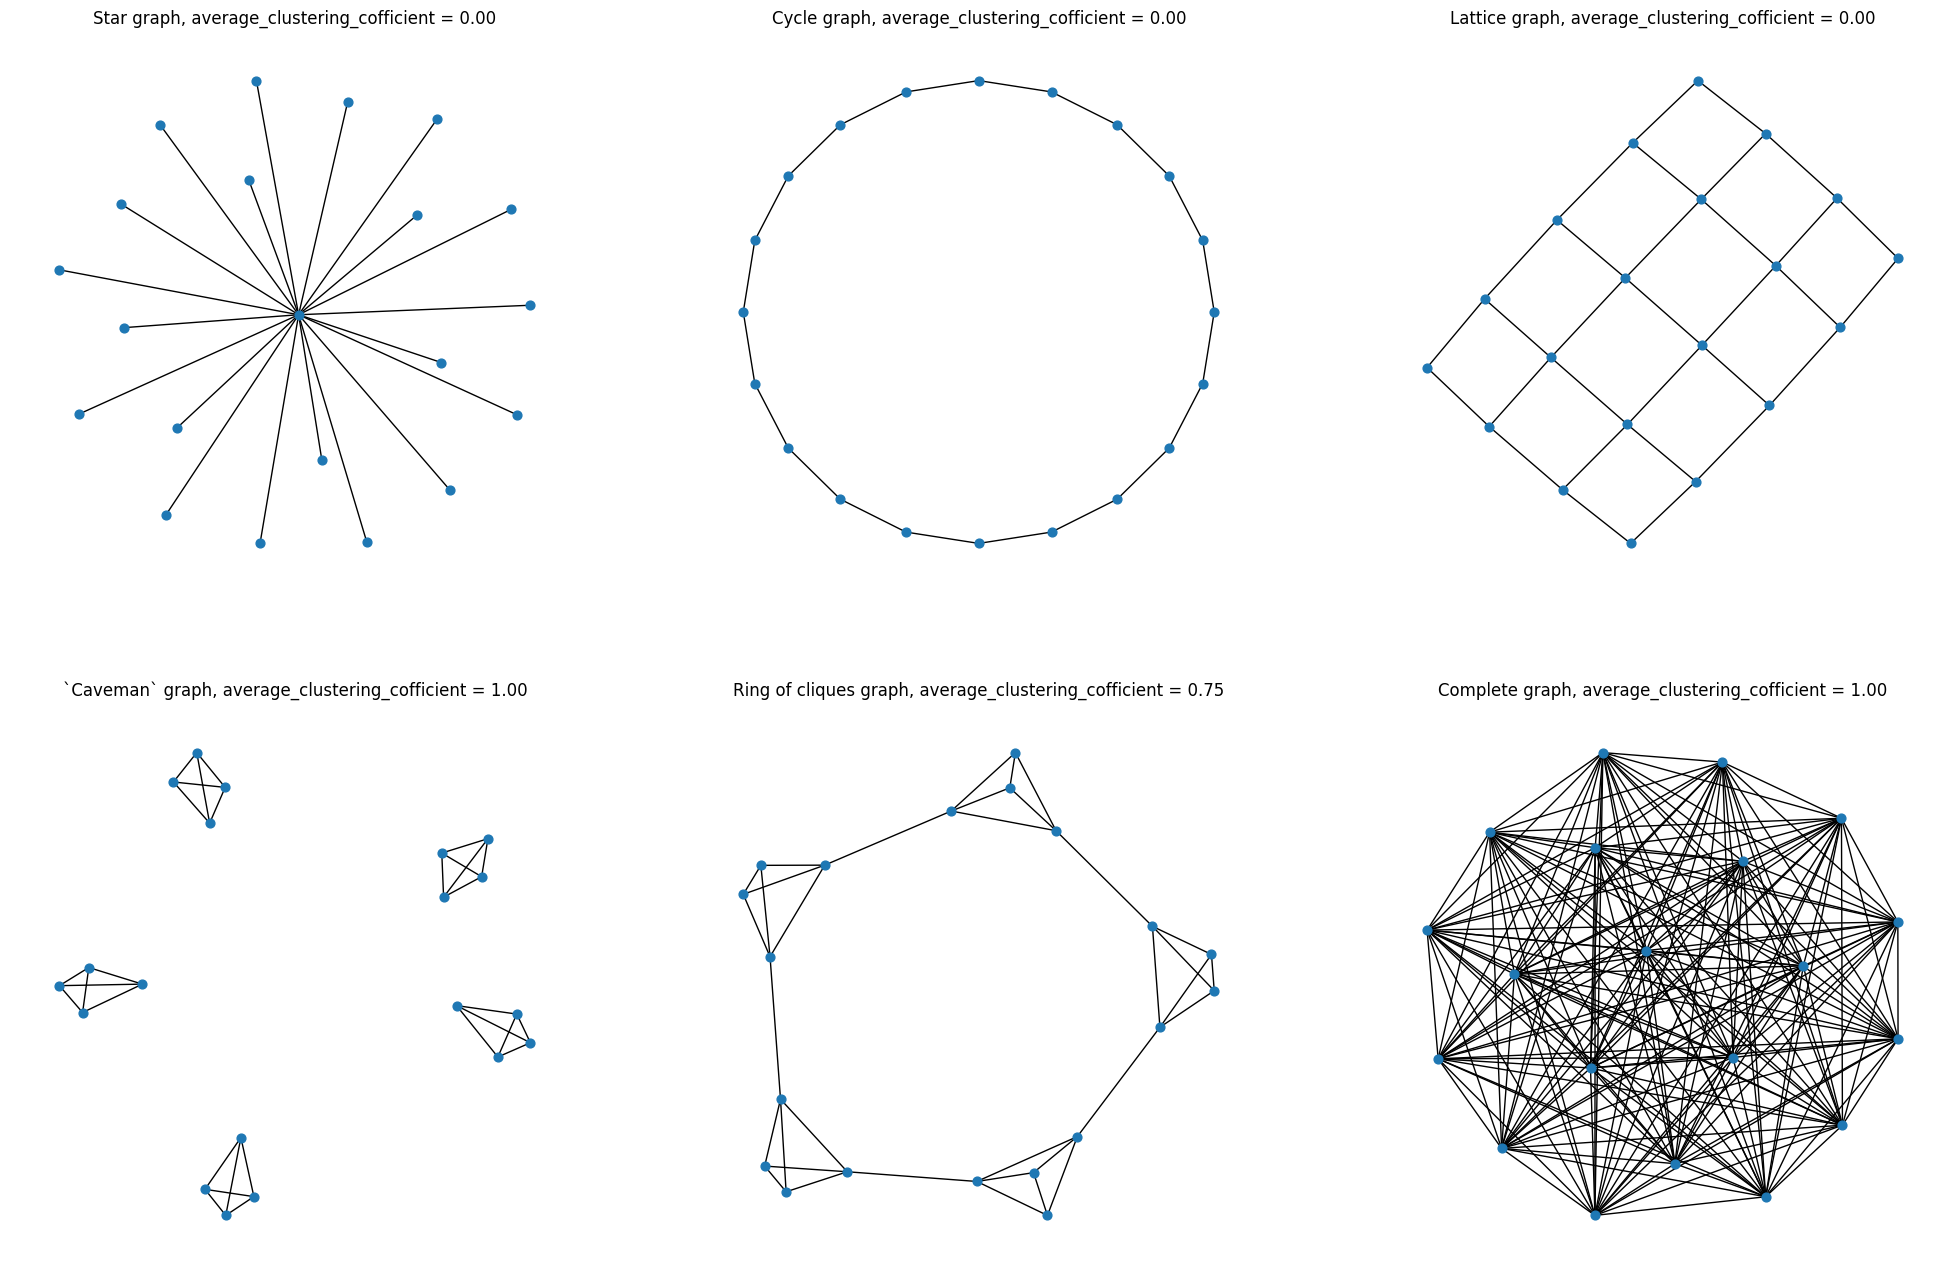

In [29]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(25, 16)) #create a plot containing two subplots/axs (1 row, 2 columns)

# draw a star graph with 20 nodes
star = nx.star_graph(20)
nx.draw(star, ax=ax1, node_size=40) 
ax1.set_title('Star graph, average_clustering_cofficient = %.2f' % nx.average_clustering(star))

# draw a circular graph with 20 nodes
cycle = nx.cycle_graph(20)
nx.draw_circular(cycle, ax=ax2, node_size=40) 
ax2.set_title('Cycle graph, average_clustering_cofficient = %.2f' % nx.average_clustering(cycle))

# draw a lattice graph with 20 nodes
lattice = nx.grid_2d_graph(5,4)
nx.draw(lattice, ax=ax3, pos=nx.spring_layout(lattice, seed=1), node_size=40) 
ax3.set_title('Lattice graph, average_clustering_cofficient = %.2f' % nx.average_clustering(lattice))


# draw a caveman graph with 20 nodes
caveman = nx.caveman_graph(5,4)
nx.draw(caveman, ax=ax4, pos=nx.spring_layout(caveman, k=0.5, seed=1), node_size=40) 
ax4.set_title('`Caveman` graph, average_clustering_cofficient = %.2f' % nx.average_clustering(caveman))

# draw a ring of cliques graph with 20 nodes
ring_of_cliques = nx.ring_of_cliques(5,4)
nx.draw(ring_of_cliques, pos=nx.spring_layout(ring_of_cliques, seed=3), ax=ax5, node_size=40) 
ax5.set_title('Ring of cliques graph, average_clustering_cofficient = %.2f' % nx.average_clustering(ring_of_cliques))

# draw a complete graph with 20 nodes (edges between all nodes): https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html
complete = nx.complete_graph(20)
nx.draw(complete, ax=ax6, node_size=40) 
ax6.set_title('Complete graph, average_clustering_cofficient = %.2f' % nx.average_clustering(complete))


plt.show()


<br>
<br>

<br>
<br>

### Determining the "Small-World"ness of the Twitch network

In [30]:
# Can the small-world phenomenon be seen here?

#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.average_shortest_path_length.html
print(f"Average shortest path length in the network: {nx.average_shortest_path_length(G):.2f}")

#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html
print(f"Average clustering coefficient in the network: {nx.average_clustering(G):.2f}")

Average shortest path length in the network: 2.11
Average clustering coefficient in the network: 0.40


In [34]:
R = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges(), seed=100)

print(f"Average shortest path length in the random network: {nx.average_shortest_path_length(R):.2f}")

print(f"Average clustering coefficient in the random network: {nx.average_clustering(R):.2f}")

Average shortest path length in the random network: 2.40
Average clustering coefficient in the random network: 0.08


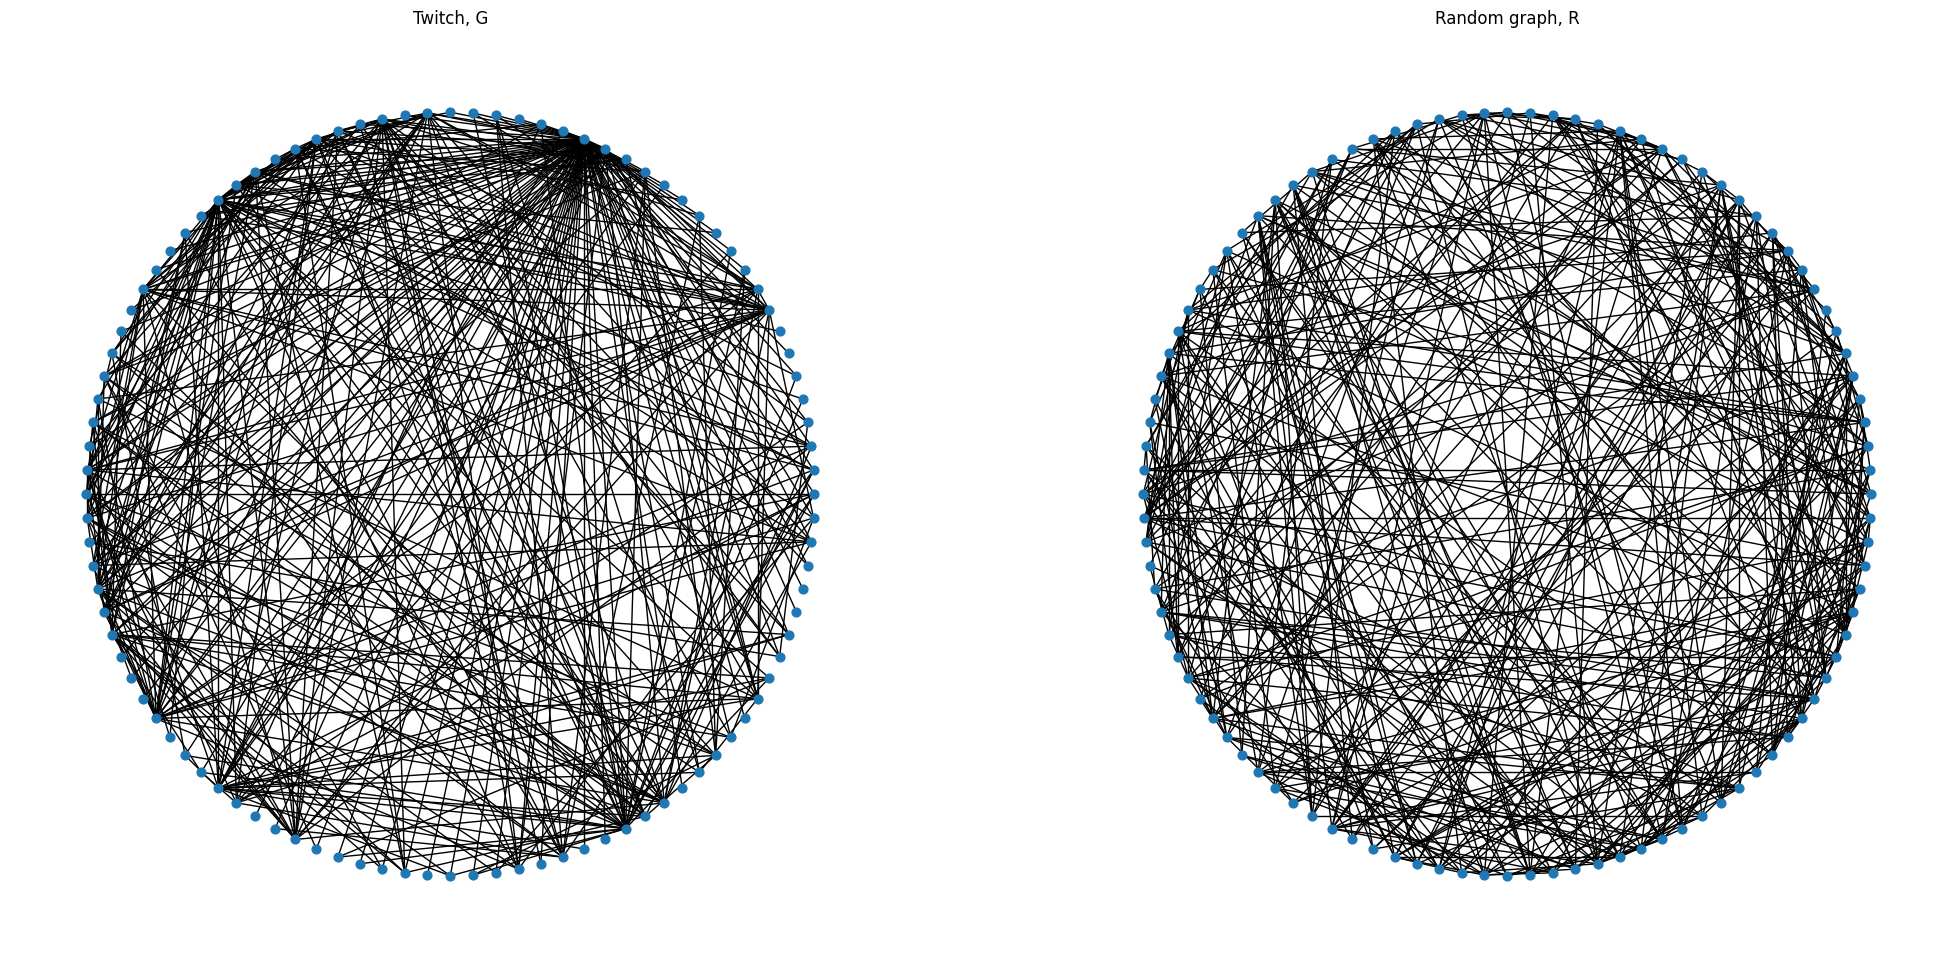

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 12))
nx.draw_circular(G, ax=ax1, node_size=40)
ax1.set_title('Twitch, G')
nx.draw_circular(R, ax=ax2, node_size=40)
ax2.set_title('Random graph, R')
plt.show()

<br/>

> **Extra**: Further reading on an alternative clustering measure - Transitivity or the 'global' clustering coefficient:<br>
> http://networksciencebook.com/chapter/2#advanced
>
> **Extra**: Extend the investigations into (local) clustering coefficient on the Twitch network and its 'comparable' random network by also calculating each network's Transitivity. NetworkX provides an API method for this:<br>
> https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.transitivity.html
>


<br>
<br>

#### A note on statistical robustness

For now we can only have partial confidence in the hypothesis that the Twitch network follows the "Small-World" phenomenon. For statistical robustness that this is often true and not just the characteristics of a particular random network we should ideally compare it against an ensemble (multiple) of random networks.


> **Extra**: Repeat the analysis in this section to compare the Twitch network against the average (mean) values of 5 different random networks. Each random network should use a different random seed value (i.e., change the value of the 'seed' when creating the random network).

Additionally, networkX provides methods for two different algorithms that aim to cover and extend this concept: 
```python
nx.omega(..)
```
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.smallworld.omega.html

and:

```python
nx.sigma(..)
```
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.smallworld.sigma.html#networkx.algorithms.smallworld.sigma

However the implementations can take a very long time to run and could be seen unstable and therefore not recommended to use:

https://github.com/networkx/networkx/issues/5064



<br>

---

<br>


## 5. Summary and motivations going forward

1. From the analysis, we have some evidence that while the 'following' mechanism on Twitch is dyadic (i.e, between pairs of individuals), the collective behaviour of the user base in doing these 'follow' actions doesn't manifest into a random network structure between users.

2. The evidence points to the user network having "small-world" characteristics as seen more generally with social networks.

3. That is, while being sparse in terms of number of possible edges, users typically cluster together at a local level and are only a friend-of-a-friend-of-a-friend (or follower-of-a-follower-of-a-follower) away from other users.

4. So what? The observation that social networks (as well as other 'real world' networks) often conform to typical structural characteristics motivates the possibility that the connections within a network could be somewhat predictable from the network structure and therefore enable the creation of tools for recommending social connections. "Link prediction" is a notable research area and often leans into the use of machine learning with measures on the structural properties of networks providing features.

> **Optional Extra**: The Link Prediction Problem for Social Networks by Liben-Nowell and Kleinberg http://snap.stanford.edu/class/cs224w-readings/nowell04linkprediction.pdf)


**Along the way we have:**

- Taken a first look at using NetworkX to analyse 'real world' networks.

- We've looked at various methods from graph theory that, while applied to specific questions on the Twitch Network, are generalisable to analysis of other networks (e.g. Happy Maps?). In some areas we have also leaned on other statistical methods in support of the network analysis.

- Some we will use again in later weeks and the rest we *could*. Equally there will be more methods introduced in later weeks/notebooks where you can go back and implement in this notebook as an extension of the Twitch analysis. Therefore the analysis here should not be considered exhaustive.


> **Optional Extra**: Repeat the analysis of this notebook using the larger dataset contained in the file "twitch_large.edgelist". Please note that due to the large number of nodes and edges the analysis could take several hours to complete. In doing so, observe the changes to the values for each part of the analysis and determine whether the concluding findings (e.g., density, degree distribution, degrees of separation, and "small-world"-ness have substantially changed.

<br/>
<br/>
<br/>

## **Extra**: Deeper Dive - Calculating the (Local) Clustering Coefficient

For unweighted graphs, the clustering of a node can be calculated as the fraction of possible triangles through that node that exist. Or alternatively thought of as:

**The number of edges connecting a node's connections / The total number of *possible* edges between the nodes's connections**

<br/>

### Example 1: Single node example

So for the following example:

![Single node example][4] - Ruggero G. Bettinardi

**The number of edges connecting a node's connections** = 4

**The total number of possible edges between the node's connections** = 6

4 / 6 = 0.66666666

> **Extra**: Alternative explanation of the clustering efficient formula.
>
> [![](https://img.youtube.com/vi/K2WF4pT5pFY/2.jpg)](https://www.youtube.com/watch?v=K2WF4pT5pFY)
>
> **Extra**: Further reading: http://networksciencebook.com/chapter/2#clustering


[4]: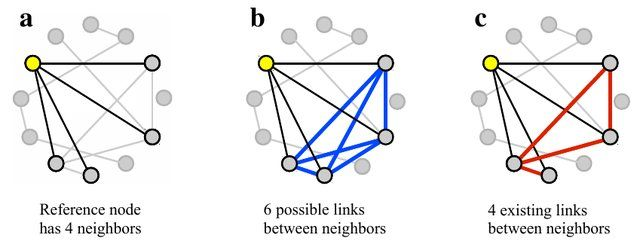


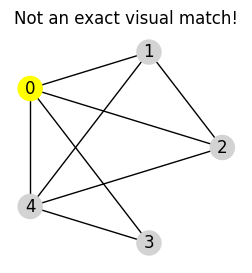

Average clustering coefficient: 0.6666666666666666


In [37]:
# Lets sanity check this, by building an example graph O that represents the highlighted nodes and edges in 'c' above. 
# The nodes (and edges) with a light grey border are not added for simplicity.

O = nx.Graph()

O.add_nodes_from([2,1,0,4,3]) #ordering only for visualisation purposes
O.add_edges_from([ #in this example, the yellow node above is node 0. Each grey node with a black border is given its id in clockwise order.
    (0,1), 
    (0,2),
    (0,3),
    (0,4),
    
    (1,4), 
    (1,2),
    (2,4),
    (3,4)
])

colors = ["lightgrey", "lightgrey", "yellow", "lightgrey", "lightgrey"]
fig, ax1 = plt.subplots(figsize=(3, 3))
nx.draw_circular(O, ax=ax1, with_labels=True, node_color=colors)
ax1.set_title("Not an exact visual match!")
plt.show()

# Calculate the clustering coefficient for the yellow node (0)
print(f"Average clustering coefficient: {nx.clustering(O, nodes=0)}")

<br/>

### Example 2: Same degree, different clustering

For this example we will use Krackhardt's kite graph: https://networkx.org/documentation/stable/reference/generated/networkx.generators.small.krackhardt_kite_graph.html

This is a small, fictional social network created by David Krackhardt and is commonly used to demonstrate, at a small scale for visualisation, how the structure of a network/graph can be measured in different ways to reveal different node 'importance'. Where importance could refer to different things such as number of connections, the number of paths that pass through it, etc.

Here we will use it look at the usefulness of considering the clustering coefficient in comparison to degree.

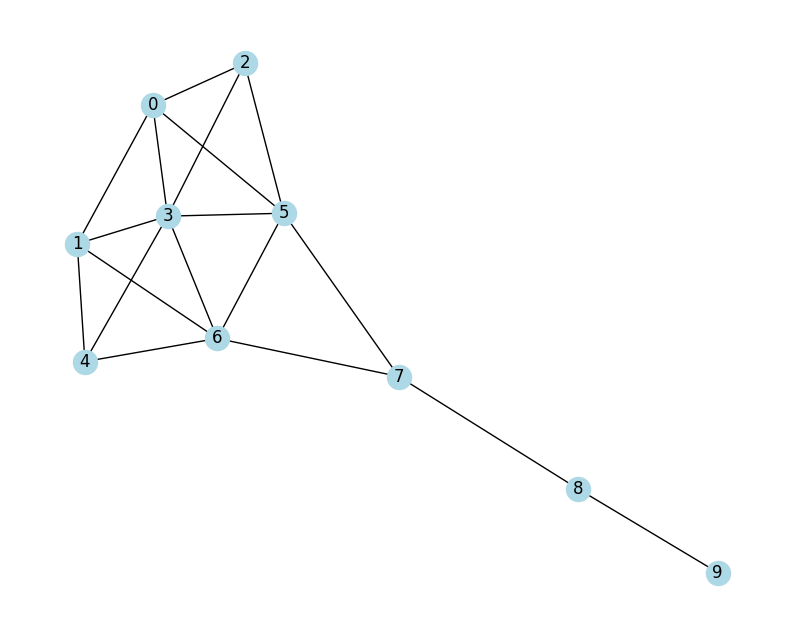

In [38]:
K = nx.krackhardt_kite_graph()

pos = nx.spring_layout(K, seed=5) # a fixed layout is used here to produce the same network visualisation as the image below
fig1, ax1 = plt.subplots(figsize=(10,8))
nx.draw(K, ax=ax1, pos=pos, with_labels=True, node_color="lightblue")
plt.show()


**Nodes 2, 4, and 7 have the same degree/number of edges/number of connections: 3.**

**But they do not all have the same clustering coefficients:**

<br/>

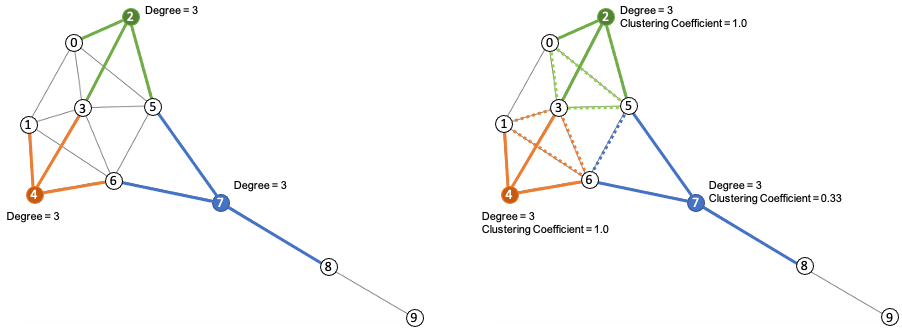

Note, the missing links between nodes 5 and 6 and 6 and 8m which effects the clustering of node 7, unlike node 2 and 4.

In [39]:
# Quick check

print(K.degree(nbunch=[2, 4, 7]))           # returns a list of tuples in the format [(node_id, degree), ... ]
print(nx.clustering(K, nodes=[2, 4, 7]))    # returns a dictionary in the format of {node_id : clustering coefficient, ... }

[(2, 3), (4, 3), (7, 3)]
{2: 1.0, 4: 1.0, 7: 0.3333333333333333}


<br/>

In a social network context, this shows that people with the same number of friends can have different topological positions in the wider social network structure and that this is useful to capture through additional measures beyond the degree. The clustering coefficient is just one of many, many measures that can be performed on networks.

Additionally, bringing this back to the concept of Paths, this can have ramifications for activities that flow 'on top' of the network structure, such as information spreading. We will explore this topic in future notebooks.

> Extra: A useful article for visualising the differences between some other ('centrality'-based) node measures can be found here: https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html

<br/>

## **Extra**: The Wattz-Strogatz model

Small-World networks can be demonstrated by a famous model for generating random graphs/networks, the Wattz-Strogatz model. The networks used below for demonstration use NetworkX's (connected) Wattz Strogatz Graph generator. 

>**Extra**: More information on the Wattz Strogatz model:<br> http://networksciencebook.com/chapter/3#clustering-3- and<br> https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.connected_watts_strogatz_graph.html

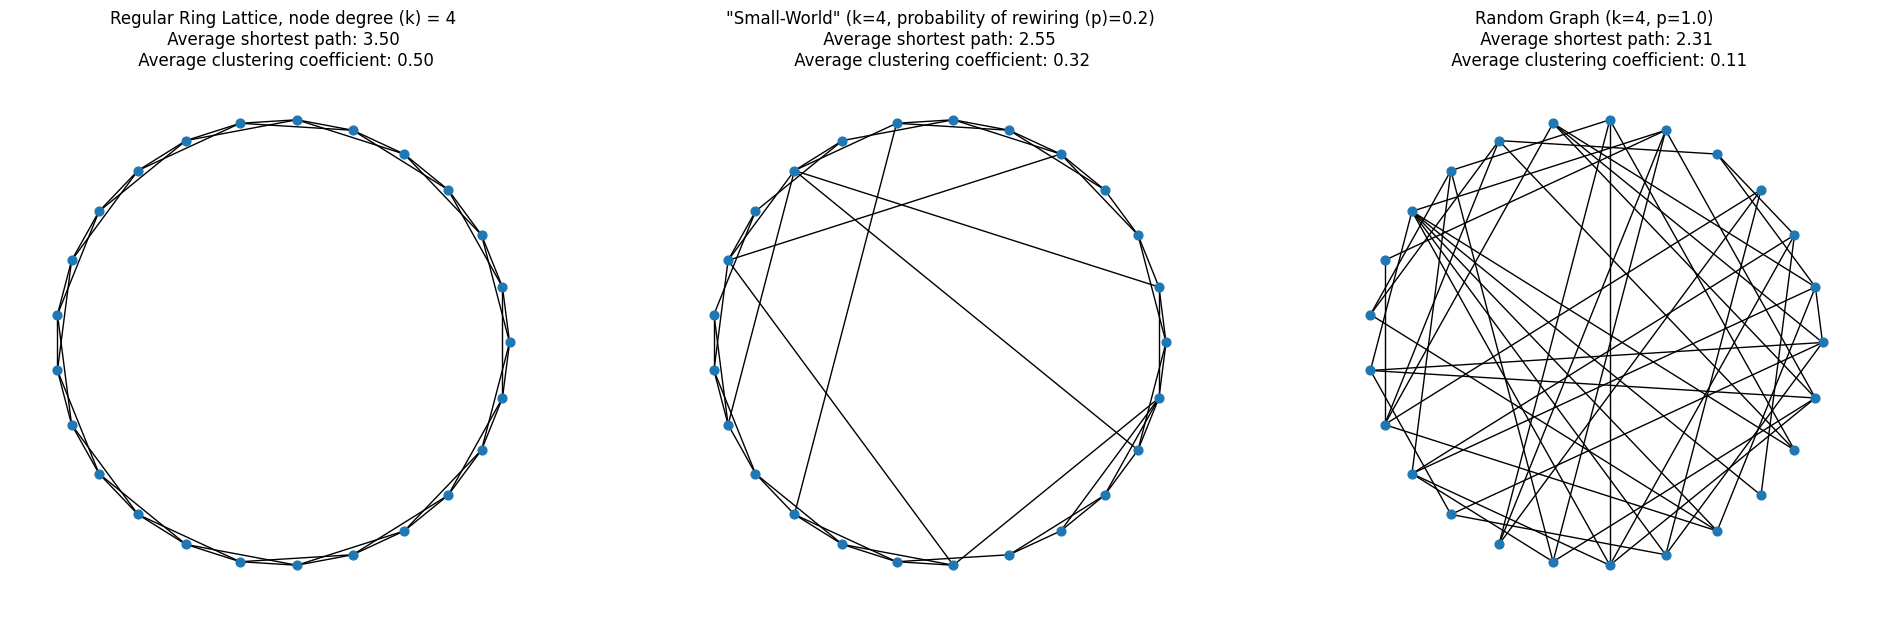

In [40]:
ring_lattice_graph = nx.connected_watts_strogatz_graph(n=25, k=4, p=0)
watts_strogatz_graph = nx.connected_watts_strogatz_graph(n=25, k=4, p=0.2, seed=10)
random_graph = nx.connected_watts_strogatz_graph(n=25, k=4, p=1, seed=10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 7)) #create a plot containing two subplots/axs (1 row, 2 columns)

nx.draw_circular(ring_lattice_graph, ax=ax1, node_size=40)
ax1.set_title('Regular Ring Lattice, node degree (k) = 4\n Average shortest path: %.2f \n Average clustering coefficient: %.2f' % (nx.average_shortest_path_length(ring_lattice_graph), nx.average_clustering(ring_lattice_graph)))

nx.draw_circular(watts_strogatz_graph, ax=ax2, node_size=40) 
ax2.set_title('"Small-World" (k=4, probability of rewiring (p)=0.2)\n Average shortest path: %.2f \n Average clustering coefficient: %.2f' % (nx.average_shortest_path_length(watts_strogatz_graph), nx.average_clustering(watts_strogatz_graph)))

nx.draw_circular(random_graph, ax=ax3, node_size=40) 
ax3.set_title('Random Graph (k=4, p=1.0) \n Average shortest path: %.2f \n Average clustering coefficient: %.2f' % (nx.average_shortest_path_length(random_graph), nx.average_clustering(random_graph)))

plt.show()